In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from analysis_functions import Analysis

# Layers VS Gradients of the 2-qubit UQC model

In this notebook, we intend to study how the gradients vary as the number of layers increases for the 2-qubit UQC Model.

Hyperparameters:

```

# Parameters for the VQC
num_qubits = 2
num_layers = Varies
num_actions = 2
vqc = UQC(num_qubits, num_layers)
qubits = cirq.GridQubit.rect(1, num_qubits)
ops = [cirq.Z(qubits[0]), cirq.Z(qubits[1])]
observables = [ops[0], ops[1]]
rescaling_type = GlobalSkolikRescaling
state_dim = 4

# Parameters for the training
gamma = 0.99
num_episodes = 1000
max_memory_length = 10000 # Maximum replay length
replay_memory = deque(maxlen=max_memory_length)
epsilon = 1.0  # Epsilon greedy parameter
epsilon_min = 0.01  # Minimum epsilon greedy parameter
decay_epsilon = 0.99 # Decay rate of epsilon greedy parameter
policy = EGreedyExpStrategy(epsilon, epsilon_min, decay_epsilon)
batch_size = 16
steps_per_update = 1 # Train the model every x steps
steps_per_target_update = 5 # Update the target model every x steps
operator = Max()
activation = "linear"

# Prepare the optimizers
learning_rate_in = 0.001
learning_rate_var = 0.001
learning_rate_out = 0.1
optimizer_in =  tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
optimizer_var = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
optimizer_bias = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
optimizer_out = tf.keras.optimizers.Adam(learning_rate=0.1, amsgrad=True)

# Assign the model parameters to each optimizer
w_in = 1
w_var = 0
w_bias = 2
w_out = 3

#Choose the environment
environment = "CartPole-v0"
input_encoding = ContinuousEncoding
early_stopping = False
acceptance_reward = 195
necessary_episodes = 25
hessian = False
```

In [16]:
uqc_2q2l_path = "../../results/uqc_2qubits_layersvsgradients/2qubits_2layers"
uqc_2q3l_path = "../../results/uqc_2qubits_layersvsgradients/2qubits_3layers"
uqc_2q4l_path = "../../results/uqc_2qubits_layersvsgradients/2qubits_4layers"
uqc_2q5l_path = "../../results/uqc_2qubits_layersvsgradients/2qubits_5layers"
uqc_2q6l_path = "../../results/uqc_2qubits_layersvsgradients/2qubits_6layers"
uqc_2q7l_path = "../../results/uqc_2qubits_layersvsgradients/2qubits_7layers"
uqc_2q8l_path = "../../results/uqc_2qubits_layersvsgradients/2qubits_8layers"
uqc_2q9l_path = "../../results/uqc_2qubits_layersvsgradients/2qubits_9layers"
uqc_2q10l_path = "../../results/uqc_2qubits_layersvsgradients/2qubits_10layers"

uqc_2q2l = Analysis(uqc_2q2l_path)
uqc_2q3l = Analysis(uqc_2q3l_path)
uqc_2q4l = Analysis(uqc_2q4l_path)
uqc_2q5l = Analysis(uqc_2q5l_path)
uqc_2q6l = Analysis(uqc_2q6l_path)
uqc_2q7l = Analysis(uqc_2q7l_path)
uqc_2q8l = Analysis(uqc_2q8l_path)
uqc_2q9l = Analysis(uqc_2q9l_path)
uqc_2q10l = Analysis(uqc_2q10l_path)

## 1.1) Performance vs Layers

In [17]:
uqc_2q2l_return = uqc_2q2l.get_rewards()
uqc_2q3l_return = uqc_2q3l.get_rewards()
uqc_2q4l_return = uqc_2q4l.get_rewards()
uqc_2q5l_return = uqc_2q5l.get_rewards()
uqc_2q6l_return = uqc_2q6l.get_rewards()
uqc_2q7l_return = uqc_2q7l.get_rewards()
uqc_2q8l_return = uqc_2q8l.get_rewards()
uqc_2q9l_return = uqc_2q9l.get_rewards()
uqc_2q10l_return = uqc_2q10l.get_rewards()

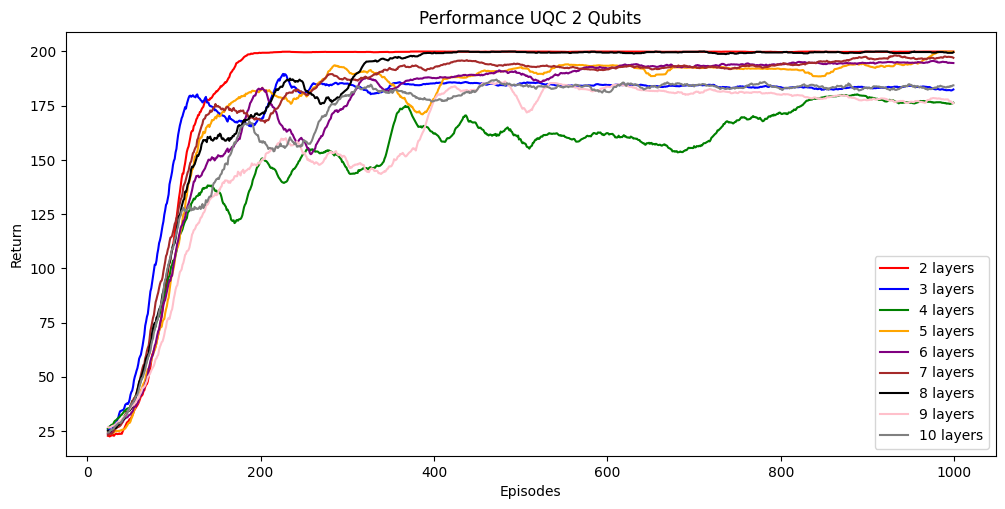

In [18]:
uqc_2q2l_mean_return = np.mean(uqc_2q2l_return, axis=0)
uqc_2q3l_mean_return = np.mean(uqc_2q3l_return, axis=0)
uqc_2q4l_mean_return = np.mean(uqc_2q4l_return, axis=0)
uqc_2q5l_mean_return = np.mean(uqc_2q5l_return, axis=0)
uqc_2q6l_mean_return = np.mean(uqc_2q6l_return, axis=0)
uqc_2q7l_mean_return = np.mean(uqc_2q7l_return, axis=0)
uqc_2q8l_mean_return = np.mean(uqc_2q8l_return, axis=0)
uqc_2q9l_mean_return = np.mean(uqc_2q9l_return, axis=0)
uqc_2q10l_mean_return = np.mean(uqc_2q10l_return, axis=0)

uqc_2q2l_moving_average = pd.Series(uqc_2q2l_mean_return).rolling(25).mean()
uqc_2q3l_moving_average = pd.Series(uqc_2q3l_mean_return).rolling(25).mean()
uqc_2q4l_moving_average = pd.Series(uqc_2q4l_mean_return).rolling(25).mean()
uqc_2q5l_moving_average = pd.Series(uqc_2q5l_mean_return).rolling(25).mean()
uqc_2q6l_moving_average = pd.Series(uqc_2q6l_mean_return).rolling(25).mean()
uqc_2q7l_moving_average = pd.Series(uqc_2q7l_mean_return).rolling(25).mean()
uqc_2q8l_moving_average = pd.Series(uqc_2q8l_mean_return).rolling(25).mean()
uqc_2q9l_moving_average = pd.Series(uqc_2q9l_mean_return).rolling(25).mean()
uqc_2q10l_moving_average = pd.Series(uqc_2q10l_mean_return).rolling(25).mean()

uqc_2q2l_std_return = np.std(uqc_2q2l_return, axis=0)
uqc_2q3l_std_return = np.std(uqc_2q3l_return, axis=0)
uqc_2q4l_std_return = np.std(uqc_2q4l_return, axis=0)
uqc_2q5l_std_return = np.std(uqc_2q5l_return, axis=0)
uqc_2q6l_std_return = np.std(uqc_2q6l_return, axis=0)
uqc_2q7l_std_return = np.std(uqc_2q7l_return, axis=0)
uqc_2q8l_std_return = np.std(uqc_2q8l_return, axis=0)
uqc_2q9l_std_return = np.std(uqc_2q9l_return, axis=0)
uqc_2q10l_std_return = np.std(uqc_2q10l_return, axis=0)

fig, axs = plt.subplots(1, 1, figsize=(12,5.5))
axs.plot(uqc_2q2l_moving_average, color = "red", label="2 layers")
#axs.fill_between(range(len(uqc_2q2l_mean_return)), uqc_2q2l_mean_return - uqc_2q2l_std_return, uqc_2q2l_mean_return + uqc_2q2l_std_return, alpha=0.2, color="red")
axs.plot(uqc_2q3l_moving_average, color = "blue", label="3 layers")
#axs.fill_between(range(len(uqc_2q3l_mean_return)), uqc_2q3l_mean_return - uqc_2q3l_std_return, uqc_2q3l_mean_return + uqc_2q3l_std_return, alpha=0.2, color="blue")
axs.plot(uqc_2q4l_moving_average, color = "green", label="4 layers")
#axs.fill_between(range(len(uqc_2q4l_mean_return)), uqc_2q4l_mean_return - uqc_2q4l_std_return, uqc_2q4l_mean_return + uqc_2q4l_std_return, alpha=0.2, color="green")
axs.plot(uqc_2q5l_moving_average, color = "orange", label="5 layers")
#axs.fill_between(range(len(uqc_2q5l_mean_return)), uqc_2q5l_mean_return - uqc_2q5l_std_return, uqc_2q5l_mean_return + uqc_2q5l_std_return, alpha=0.2, color="orange")
axs.plot(uqc_2q6l_moving_average, color = "purple", label="6 layers")
#axs.fill_between(range(len(uqc_2q6l_mean_return)), uqc_2q6l_mean_return - uqc_2q6l_std_return, uqc_2q6l_mean_return + uqc_2q6l_std_return, alpha=0.2, color="purple")
axs.plot(uqc_2q7l_moving_average, color = "brown", label="7 layers")
#axs.fill_between(range(len(uqc_2q7l_mean_return)), uqc_2q7l_mean_return - uqc_2q7l_std_return, uqc_2q7l_mean_return + uqc_2q7l_std_return, alpha=0.2, color="brown")
axs.plot(uqc_2q8l_moving_average, color = "black", label="8 layers")
#axs.fill_between(range(len(uqc_2q8l_mean_return)), uqc_2q8l_mean_return - uqc_2q8l_std_return, uqc_2q8l_mean_return + uqc_2q8l_std_return, alpha=0.2, color="black")
axs.plot(uqc_2q9l_moving_average, color = "pink", label="9 layers")
#axs.fill_between(range(len(uqc_2q9l_mean_return)), uqc_2q9l_mean_return - uqc_2q9l_std_return, uqc_2q9l_mean_return + uqc_2q9l_std_return, alpha=0.2, color="pink")
axs.plot(uqc_2q10l_moving_average, color = "grey", label="10 layers")



axs.set_xlabel("Episodes")
axs.set_ylabel("Return")
axs.set_title("Performance UQC 2 Qubits")
axs.legend()
plt.show()


## 1.2) Gradients vs Layers

In [19]:
uqc_2q2l_mean_gradients, uqc_2q2l_variance_gradients = uqc_2q2l.get_gradients_all_params()
uqc_2q3l_mean_gradients, uqc_2q3l_variance_gradients = uqc_2q3l.get_gradients_all_params()
uqc_2q4l_mean_gradients, uqc_2q4l_variance_gradients = uqc_2q4l.get_gradients_all_params()
uqc_2q5l_mean_gradients, uqc_2q5l_variance_gradients = uqc_2q5l.get_gradients_all_params()
uqc_2q6l_mean_gradients, uqc_2q6l_variance_gradients = uqc_2q6l.get_gradients_all_params()
uqc_2q7l_mean_gradients, uqc_2q7l_variance_gradients = uqc_2q7l.get_gradients_all_params()
uqc_2q8l_mean_gradients, uqc_2q8l_variance_gradients = uqc_2q8l.get_gradients_all_params()
uqc_2q9l_mean_gradients, uqc_2q9l_variance_gradients = uqc_2q9l.get_gradients_all_params()
uqc_2q10l_mean_gradients, uqc_2q10l_variance_gradients = uqc_2q10l.get_gradients_all_params()

In [20]:
uqc_2q2l_mean_gradients_smoothed = pd.Series(uqc_2q2l_mean_gradients).rolling(250).mean()
uqc_2q3l_mean_gradients_smoothed = pd.Series(uqc_2q3l_mean_gradients).rolling(250).mean()
uqc_2q4l_mean_gradients_smoothed = pd.Series(uqc_2q4l_mean_gradients).rolling(250).mean()
uqc_2q5l_mean_gradients_smoothed = pd.Series(uqc_2q5l_mean_gradients).rolling(250).mean()
uqc_2q6l_mean_gradients_smoothed = pd.Series(uqc_2q6l_mean_gradients).rolling(250).mean()
uqc_2q7l_mean_gradients_smoothed = pd.Series(uqc_2q7l_mean_gradients).rolling(250).mean()
uqc_2q8l_mean_gradients_smoothed = pd.Series(uqc_2q8l_mean_gradients).rolling(250).mean()
uqc_2q9l_mean_gradients_smoothed = pd.Series(uqc_2q9l_mean_gradients).rolling(250).mean()
uqc_2q10l_mean_gradients_smoothed = pd.Series(uqc_2q10l_mean_gradients).rolling(250).mean()

uqc_2q2l_variance_gradients_smoothed = pd.Series(uqc_2q2l_variance_gradients).rolling(250).mean()
uqc_2q3l_variance_gradients_smoothed = pd.Series(uqc_2q3l_variance_gradients).rolling(250).mean()
uqc_2q4l_variance_gradients_smoothed = pd.Series(uqc_2q4l_variance_gradients).rolling(250).mean()
uqc_2q5l_variance_gradients_smoothed = pd.Series(uqc_2q5l_variance_gradients).rolling(250).mean()
uqc_2q6l_variance_gradients_smoothed = pd.Series(uqc_2q6l_variance_gradients).rolling(250).mean()
uqc_2q7l_variance_gradients_smoothed = pd.Series(uqc_2q7l_variance_gradients).rolling(250).mean()
uqc_2q8l_variance_gradients_smoothed = pd.Series(uqc_2q8l_variance_gradients).rolling(250).mean()
uqc_2q9l_variance_gradients_smoothed = pd.Series(uqc_2q9l_variance_gradients).rolling(250).mean()
uqc_2q10l_variance_gradients_smoothed = pd.Series(uqc_2q10l_variance_gradients).rolling(250).mean()

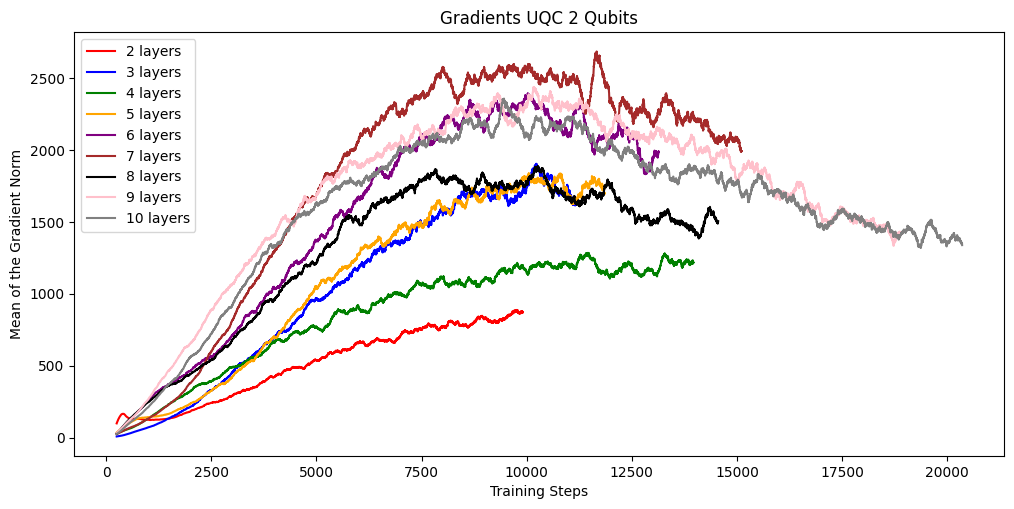

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(12,5.5))
axs.plot(uqc_2q2l_mean_gradients_smoothed, color = "red", label="2 layers")
axs.plot(uqc_2q3l_mean_gradients_smoothed, color = "blue", label="3 layers")
axs.plot(uqc_2q4l_mean_gradients_smoothed, color = "green", label="4 layers")
axs.plot(uqc_2q5l_mean_gradients_smoothed, color = "orange", label="5 layers")
axs.plot(uqc_2q6l_mean_gradients_smoothed, color = "purple", label="6 layers")
axs.plot(uqc_2q7l_mean_gradients_smoothed, color = "brown", label="7 layers")
axs.plot(uqc_2q8l_mean_gradients_smoothed, color = "black", label="8 layers")
axs.plot(uqc_2q9l_mean_gradients_smoothed, color = "pink", label="9 layers")
axs.plot(uqc_2q10l_mean_gradients_smoothed, color = "grey", label="10 layers")

axs.set_xlabel("Training Steps")
axs.set_ylabel("Mean of the Gradient Norm")
axs.set_title("Gradients UQC 2 Qubits")
axs.legend()
plt.show()

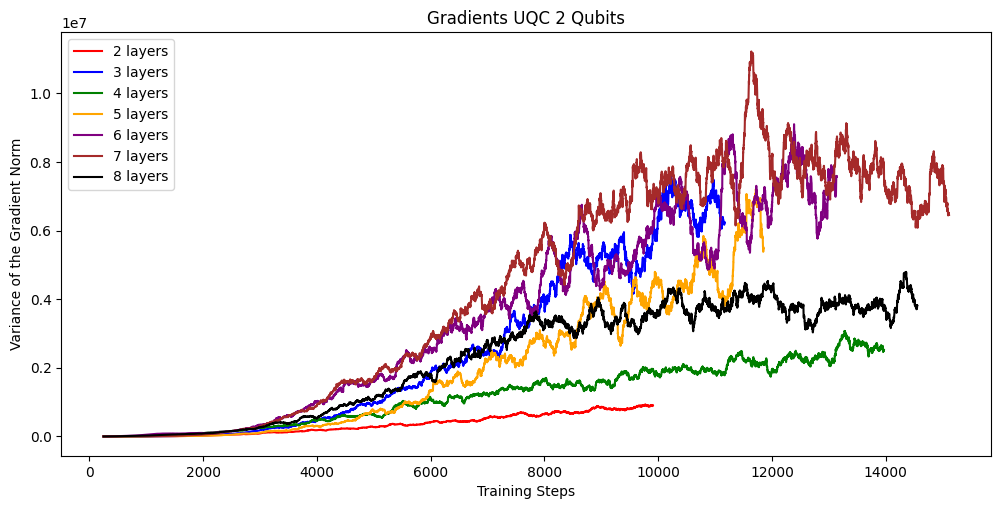

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(12,5.5))

axs.plot(uqc_2q2l_variance_gradients_smoothed, color = "red", label="2 layers")
axs.plot(uqc_2q3l_variance_gradients_smoothed, color = "blue", label="3 layers")
axs.plot(uqc_2q4l_variance_gradients_smoothed, color = "green", label="4 layers")
axs.plot(uqc_2q5l_variance_gradients_smoothed, color = "orange", label="5 layers")
axs.plot(uqc_2q6l_variance_gradients_smoothed, color = "purple", label="6 layers")
axs.plot(uqc_2q7l_variance_gradients_smoothed, color = "brown", label="7 layers")
axs.plot(uqc_2q8l_variance_gradients_smoothed, color = "black", label="8 layers")

axs.set_xlabel("Training Steps")
axs.set_ylabel("Variance of the Gradient Norm")
axs.set_title("Gradients UQC 2 Qubits")
axs.legend()
plt.show()


# 2) Layers VS Gradients of the Skolik Model

In [23]:
skolik_2l_path = "../../results/skolik_layersvsgradients/skolik_2layers"
skolik_3l_path = "../../results/skolik_layersvsgradients/skolik_3layers"
skolik_4l_path = "../../results/skolik_layersvsgradients/skolik_4layers"
skolik_5l_path = "../../results/skolik_layersvsgradients/skolik_5layers"
skolik_6l_path = "../../results/skolik_layersvsgradients/skolik_6layers"
skolik_7l_path = "../../results/skolik_layersvsgradients/skolik_7layers"
skolik_8l_path = "../../results/skolik_layersvsgradients/skolik_8layers"

skolik_2l = Analysis(skolik_2l_path)
skolik_3l = Analysis(skolik_3l_path)
skolik_4l = Analysis(skolik_4l_path)
skolik_5l = Analysis(skolik_5l_path)
skolik_6l = Analysis(skolik_6l_path)
skolik_7l = Analysis(skolik_7l_path)
skolik_8l = Analysis(skolik_8l_path)

## 1.1) Performance vs Layers

In [24]:
skolik_2l_return = skolik_2l.get_rewards()
skolik_3l_return = skolik_3l.get_rewards()
skolik_4l_return = skolik_4l.get_rewards()
skolik_5l_return = skolik_5l.get_rewards()
skolik_6l_return = skolik_6l.get_rewards()
skolik_7l_return = skolik_7l.get_rewards()
skolik_8l_return = skolik_8l.get_rewards()

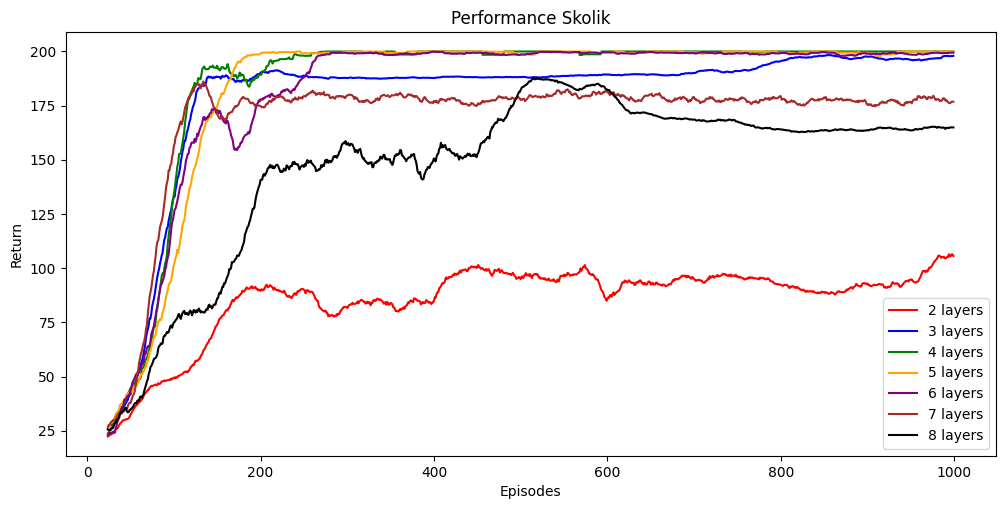

In [25]:
skolik_2l_mean_return = np.mean(skolik_2l_return, axis=0)
skolik_3l_mean_return = np.mean(skolik_3l_return, axis=0)
skolik_4l_mean_return = np.mean(skolik_4l_return, axis=0)
skolik_5l_mean_return = np.mean(skolik_5l_return, axis=0)
skolik_6l_mean_return = np.mean(skolik_6l_return, axis=0)
skolik_7l_mean_return = np.mean(skolik_7l_return, axis=0)
skolik_8l_mean_return = np.mean(skolik_8l_return, axis=0)

skolik_2l_moving_average = pd.Series(skolik_2l_mean_return).rolling(25).mean()
skolik_3l_moving_average = pd.Series(skolik_3l_mean_return).rolling(25).mean()
skolik_4l_moving_average = pd.Series(skolik_4l_mean_return).rolling(25).mean()
skolik_5l_moving_average = pd.Series(skolik_5l_mean_return).rolling(25).mean()
skolik_6l_moving_average = pd.Series(skolik_6l_mean_return).rolling(25).mean()
skolik_7l_moving_average = pd.Series(skolik_7l_mean_return).rolling(25).mean()
skolik_8l_moving_average = pd.Series(skolik_8l_mean_return).rolling(25).mean()

skolik_2l_std_return = np.std(skolik_2l_return, axis=0)
skolik_3l_std_return = np.std(skolik_3l_return, axis=0)
skolik_4l_std_return = np.std(skolik_4l_return, axis=0)
skolik_5l_std_return = np.std(skolik_5l_return, axis=0)
skolik_6l_std_return = np.std(skolik_6l_return, axis=0)
skolik_7l_std_return = np.std(skolik_7l_return, axis=0)
skolik_8l_std_return = np.std(skolik_8l_return, axis=0)

fig, axs = plt.subplots(1, 1, figsize=(12,5.5))
axs.plot(skolik_2l_moving_average, color = "red", label="2 layers")
#axs.fill_between(range(len(skolik_2l_mean_return)), skolik_2l_mean_return - skolik_2l_std_return, skolik_2l_mean_return + skolik_2l_std_return, alpha=0.2, color="red")
axs.plot(skolik_3l_moving_average, color = "blue", label="3 layers")
#axs.fill_between(range(len(skolik_3l_mean_return)), skolik_3l_mean_return - skolik_3l_std_return, skolik_3l_mean_return + skolik_3l_std_return, alpha=0.2, color="blue")
axs.plot(skolik_4l_moving_average, color = "green", label="4 layers")
#axs.fill_between(range(len(skolik_4l_mean_return)), skolik_4l_mean_return - skolik_4l_std_return, skolik_4l_mean_return + skolik_4l_std_return, alpha=0.2, color="green")
axs.plot(skolik_5l_moving_average, color = "orange", label="5 layers")
#axs.fill_between(range(len(skolik_5l_mean_return)), skolik_5l_mean_return - skolik_5l_std_return, skolik_5l_mean_return + skolik_5l_std_return, alpha=0.2, color="orange")
axs.plot(skolik_6l_moving_average, color = "purple", label="6 layers")
#axs.fill_between(range(len(skolik_6l_mean_return)), skolik_6l_mean_return
# - skolik_6l_std_return, skolik_6l_mean_return + skolik_6l_std_return, alpha=0.2, color="purple")
axs.plot(skolik_7l_moving_average, color = "brown", label="7 layers")
#axs.fill_between(range(len(skolik_7l_mean_return)), skolik_7l_mean_return - skolik_7l_std_return, skolik_7l_mean_return + skolik_7l_std_return, alpha=0.2, color="brown")
axs.plot(skolik_8l_moving_average, color = "black", label="8 layers")
#axs.fill_between(range(len(skolik_8l_mean_return)), skolik_8l_mean_return - skolik_8l_std_return, skolik_8l_mean_return + skolik_8l_std_return, alpha=0.2, color="black")

axs.set_xlabel("Episodes")
axs.set_ylabel("Return")
axs.set_title("Performance Skolik")
axs.legend()
plt.show()

## 1.2) Gradients vs Layers

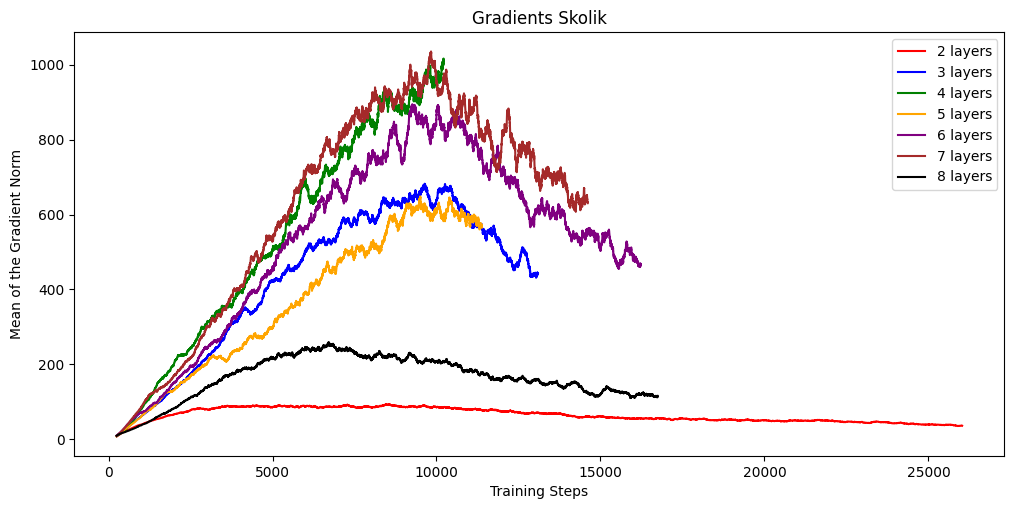

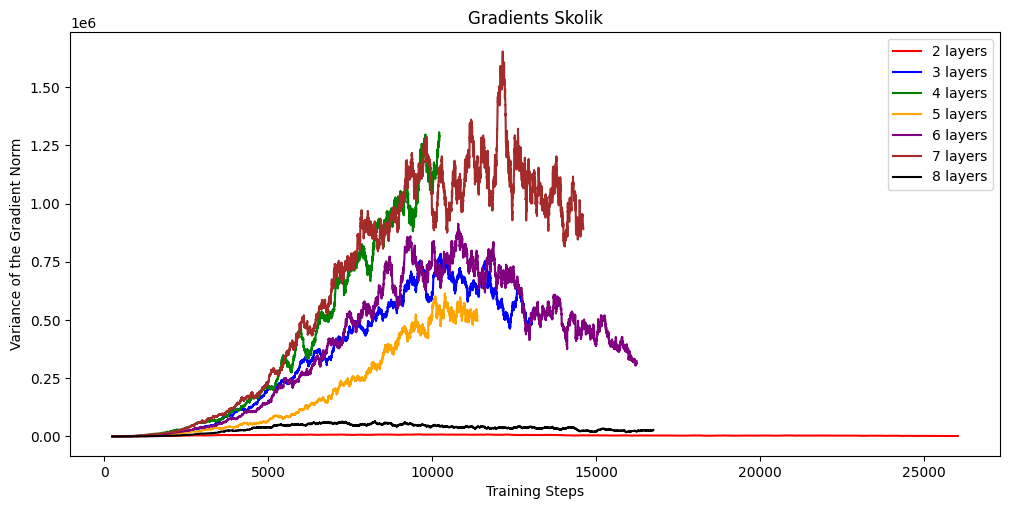

In [26]:

skolik_2l_mean_gradients, skolik_2l_variance_gradients = skolik_2l.get_gradients_all_params()
skolik_3l_mean_gradients, skolik_3l_variance_gradients = skolik_3l.get_gradients_all_params()
skolik_4l_mean_gradients, skolik_4l_variance_gradients = skolik_4l.get_gradients_all_params()
skolik_5l_mean_gradients, skolik_5l_variance_gradients = skolik_5l.get_gradients_all_params()
skolik_6l_mean_gradients, skolik_6l_variance_gradients = skolik_6l.get_gradients_all_params()
skolik_7l_mean_gradients, skolik_7l_variance_gradients = skolik_7l.get_gradients_all_params()
skolik_8l_mean_gradients, skolik_8l_variance_gradients = skolik_8l.get_gradients_all_params()

skolik_2l_mean_gradients_smoothed = pd.Series(skolik_2l_mean_gradients).rolling(250).mean()
skolik_3l_mean_gradients_smoothed = pd.Series(skolik_3l_mean_gradients).rolling(250).mean()
skolik_4l_mean_gradients_smoothed = pd.Series(skolik_4l_mean_gradients).rolling(250).mean()
skolik_5l_mean_gradients_smoothed = pd.Series(skolik_5l_mean_gradients).rolling(250).mean()
skolik_6l_mean_gradients_smoothed = pd.Series(skolik_6l_mean_gradients).rolling(250).mean()
skolik_7l_mean_gradients_smoothed = pd.Series(skolik_7l_mean_gradients).rolling(250).mean()
skolik_8l_mean_gradients_smoothed = pd.Series(skolik_8l_mean_gradients).rolling(250).mean()

skolik_2l_variance_gradients_smoothed = pd.Series(skolik_2l_variance_gradients).rolling(250).mean()
skolik_3l_variance_gradients_smoothed = pd.Series(skolik_3l_variance_gradients).rolling(250).mean()
skolik_4l_variance_gradients_smoothed = pd.Series(skolik_4l_variance_gradients).rolling(250).mean()
skolik_5l_variance_gradients_smoothed = pd.Series(skolik_5l_variance_gradients).rolling(250).mean()
skolik_6l_variance_gradients_smoothed = pd.Series(skolik_6l_variance_gradients).rolling(250).mean()
skolik_7l_variance_gradients_smoothed = pd.Series(skolik_7l_variance_gradients).rolling(250).mean()
skolik_8l_variance_gradients_smoothed = pd.Series(skolik_8l_variance_gradients).rolling(250).mean()

fig, axs = plt.subplots(1, 1, figsize=(12,5.5))
axs.plot(skolik_2l_mean_gradients_smoothed, color = "red", label="2 layers")
axs.plot(skolik_3l_mean_gradients_smoothed, color = "blue", label="3 layers")
axs.plot(skolik_4l_mean_gradients_smoothed, color = "green", label="4 layers")
axs.plot(skolik_5l_mean_gradients_smoothed, color = "orange", label="5 layers")
axs.plot(skolik_6l_mean_gradients_smoothed, color = "purple", label="6 layers")
axs.plot(skolik_7l_mean_gradients_smoothed, color = "brown", label="7 layers")
axs.plot(skolik_8l_mean_gradients_smoothed, color = "black", label="8 layers")

axs.set_xlabel("Training Steps")
axs.set_ylabel("Mean of the Gradient Norm")
axs.set_title("Gradients Skolik")
axs.legend()
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(12,5.5))

axs.plot(skolik_2l_variance_gradients_smoothed, color = "red", label="2 layers")
axs.plot(skolik_3l_variance_gradients_smoothed, color = "blue", label="3 layers")
axs.plot(skolik_4l_variance_gradients_smoothed, color = "green", label="4 layers")
axs.plot(skolik_5l_variance_gradients_smoothed, color = "orange", label="5 layers")
axs.plot(skolik_6l_variance_gradients_smoothed, color = "purple", label="6 layers")
axs.plot(skolik_7l_variance_gradients_smoothed, color = "brown", label="7 layers")
axs.plot(skolik_8l_variance_gradients_smoothed, color = "black", label="8 layers")

axs.set_xlabel("Training Steps")
axs.set_ylabel("Variance of the Gradient Norm")
axs.set_title("Gradients Skolik")
axs.legend()
plt.show()

# 3) Skolik vs UQC

## 3.1) Performance vs Layers

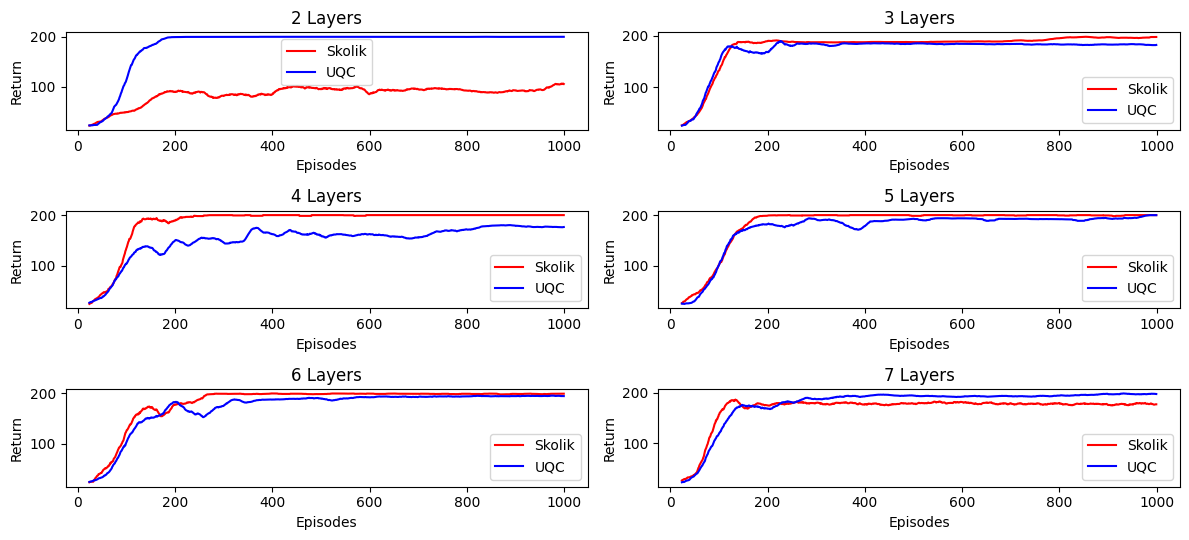

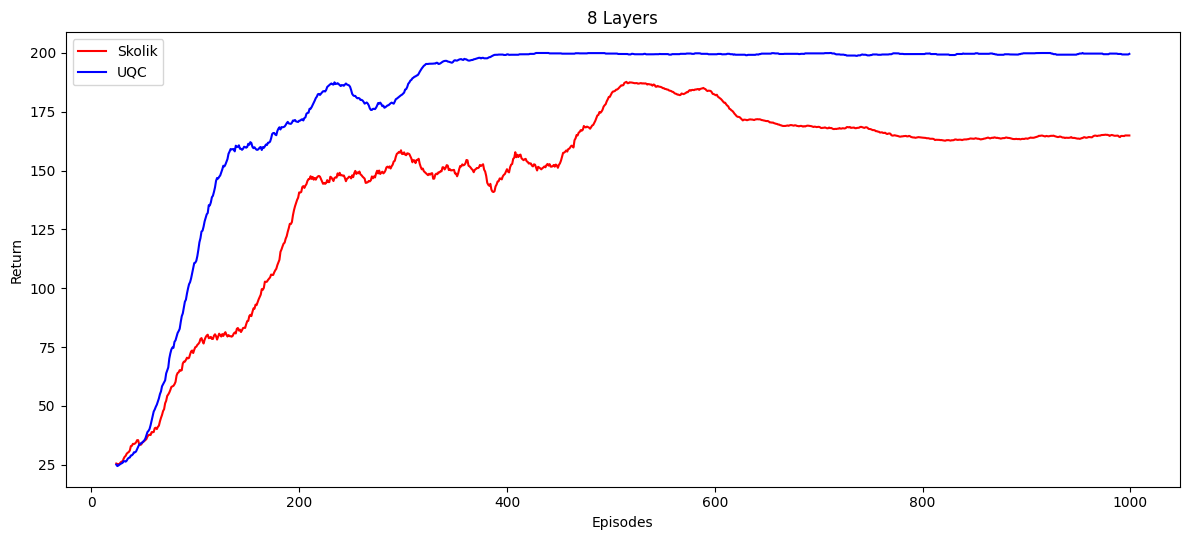

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(12,5.5), tight_layout=True)

axs[0,0].plot(skolik_2l_moving_average, color = "red", label="Skolik")
axs[0,0].plot(uqc_2q2l_moving_average, color = "blue", label="UQC")
axs[0,0].set_title("2 Layers")
axs[0,0].set_xlabel("Episodes")
axs[0,0].set_ylabel("Return")
axs[0,0].legend()

axs[0,1].plot(skolik_3l_moving_average, color = "red", label="Skolik")
axs[0,1].plot(uqc_2q3l_moving_average, color = "blue", label="UQC")
axs[0,1].set_title("3 Layers")
axs[0,1].set_xlabel("Episodes")
axs[0,1].set_ylabel("Return")
axs[0,1].legend()

axs[1,0].plot(skolik_4l_moving_average, color = "red", label="Skolik")
axs[1,0].plot(uqc_2q4l_moving_average, color = "blue", label="UQC")
axs[1,0].set_title("4 Layers")
axs[1,0].set_xlabel("Episodes")
axs[1,0].set_ylabel("Return")
axs[1,0].legend()

axs[1,1].plot(skolik_5l_moving_average, color = "red", label="Skolik")
axs[1,1].plot(uqc_2q5l_moving_average, color = "blue", label="UQC")
axs[1,1].set_title("5 Layers")
axs[1,1].set_xlabel("Episodes")
axs[1,1].set_ylabel("Return")
axs[1,1].legend()

axs[2,0].plot(skolik_6l_moving_average, color = "red", label="Skolik")
axs[2,0].plot(uqc_2q6l_moving_average, color = "blue", label="UQC")
axs[2,0].set_title("6 Layers")
axs[2,0].set_xlabel("Episodes")
axs[2,0].set_ylabel("Return")
axs[2,0].legend()

axs[2,1].plot(skolik_7l_moving_average, color = "red", label="Skolik")
axs[2,1].plot(uqc_2q7l_moving_average, color = "blue", label="UQC")
axs[2,1].set_title("7 Layers")
axs[2,1].set_xlabel("Episodes")
axs[2,1].set_ylabel("Return")
axs[2,1].legend()

plt.show()

fig, axs = plt.subplots(1,1, figsize=(12,5.5), tight_layout=True)

axs.plot(skolik_8l_moving_average, color = "red", label="Skolik")
axs.plot(uqc_2q8l_moving_average, color = "blue", label="UQC")
axs.set_title("8 Layers")
axs.set_xlabel("Episodes")
axs.set_ylabel("Return")
axs.legend()

plt.show()

## 3.2) Gradients vs Layers

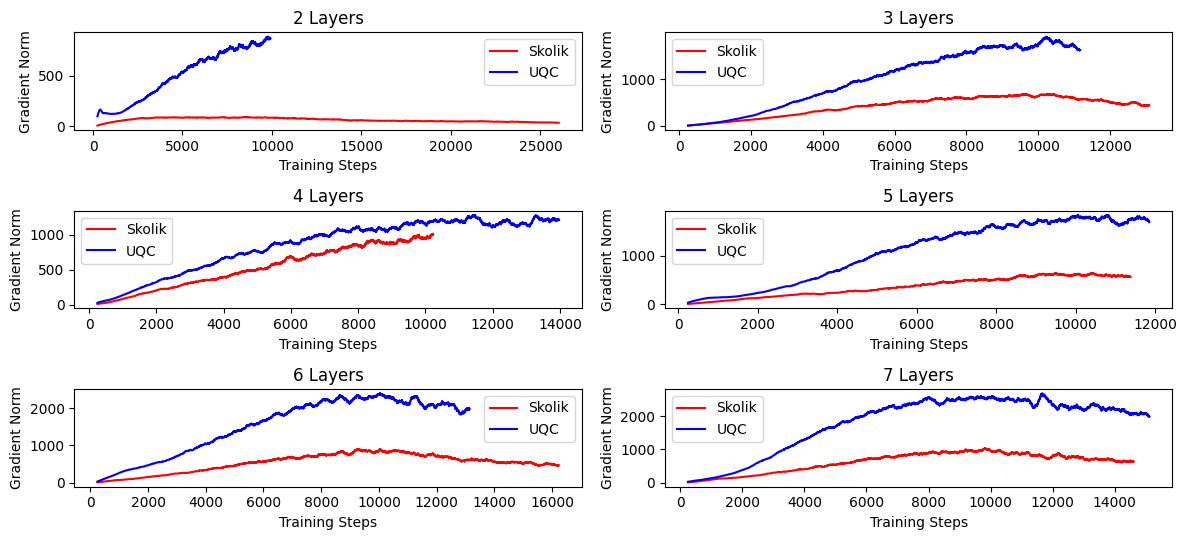

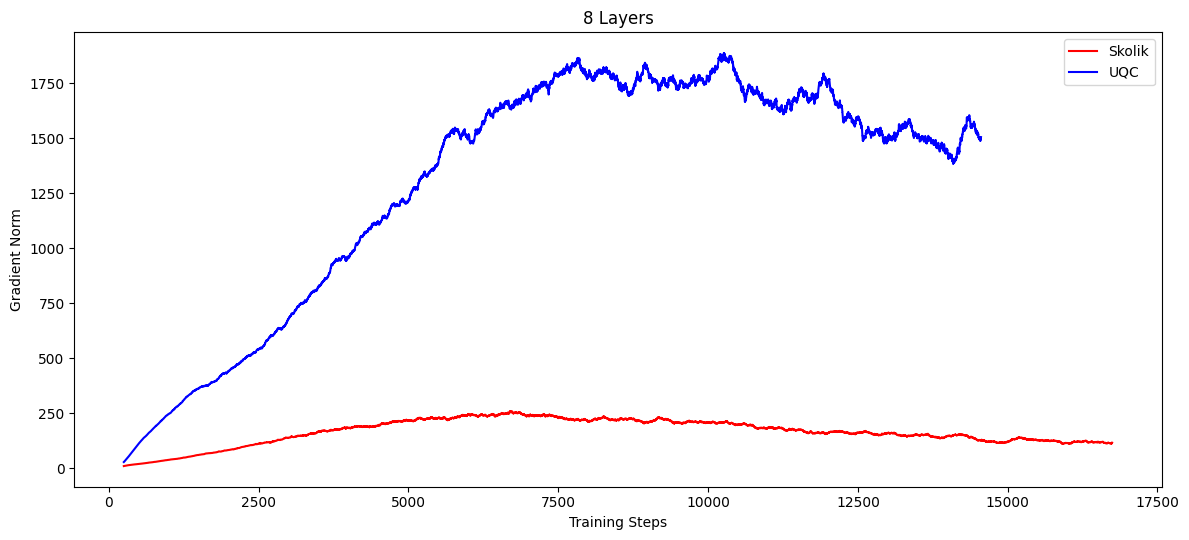

In [29]:
fig, axs = plt.subplots(3, 2, figsize=(12,5.5), tight_layout=True)

axs[0,0].plot(skolik_2l_mean_gradients_smoothed, color = "red", label="Skolik")
axs[0,0].plot(uqc_2q2l_mean_gradients_smoothed, color = "blue", label="UQC")
axs[0,0].set_title("2 Layers")
axs[0,0].set_xlabel("Training Steps")
axs[0,0].set_ylabel("Gradient Norm")
axs[0,0].legend()

axs[0,1].plot(skolik_3l_mean_gradients_smoothed, color = "red", label="Skolik")
axs[0,1].plot(uqc_2q3l_mean_gradients_smoothed, color = "blue", label="UQC")
axs[0,1].set_title("3 Layers")
axs[0,1].set_xlabel("Training Steps")
axs[0,1].set_ylabel("Gradient Norm")
axs[0,1].legend()

axs[1,0].plot(skolik_4l_mean_gradients_smoothed, color = "red", label="Skolik")
axs[1,0].plot(uqc_2q4l_mean_gradients_smoothed, color = "blue", label="UQC")
axs[1,0].set_title("4 Layers")
axs[1,0].set_xlabel("Training Steps")
axs[1,0].set_ylabel("Gradient Norm")
axs[1,0].legend()

axs[1,1].plot(skolik_5l_mean_gradients_smoothed, color = "red", label="Skolik")
axs[1,1].plot(uqc_2q5l_mean_gradients_smoothed, color = "blue", label="UQC")
axs[1,1].set_title("5 Layers")
axs[1,1].set_xlabel("Training Steps")
axs[1,1].set_ylabel("Gradient Norm")
axs[1,1].legend()

axs[2,0].plot(skolik_6l_mean_gradients_smoothed, color = "red", label="Skolik")
axs[2,0].plot(uqc_2q6l_mean_gradients_smoothed, color = "blue", label="UQC")
axs[2,0].set_title("6 Layers")
axs[2,0].set_xlabel("Training Steps")
axs[2,0].set_ylabel("Gradient Norm")
axs[2,0].legend()

axs[2,1].plot(skolik_7l_mean_gradients_smoothed, color = "red", label="Skolik")
axs[2,1].plot(uqc_2q7l_mean_gradients_smoothed, color = "blue", label="UQC")
axs[2,1].set_title("7 Layers")
axs[2,1].set_xlabel("Training Steps")
axs[2,1].set_ylabel("Gradient Norm")
axs[2,1].legend()

plt.show()

fig, axs = plt.subplots(1,1, figsize=(12,5.5), tight_layout=True)

axs.plot(skolik_8l_mean_gradients_smoothed, color = "red", label="Skolik")
axs.plot(uqc_2q8l_mean_gradients_smoothed, color = "blue", label="UQC")
axs.set_title("8 Layers")
axs.set_xlabel("Training Steps")
axs.set_ylabel("Gradient Norm")
axs.legend()

plt.show()